# Importing Libraries

In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
#Deep Learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
#performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Data Exploration

In [2]:
#loading the data
data = pd.read_csv("adult.csv")

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


<AxesSubplot: >

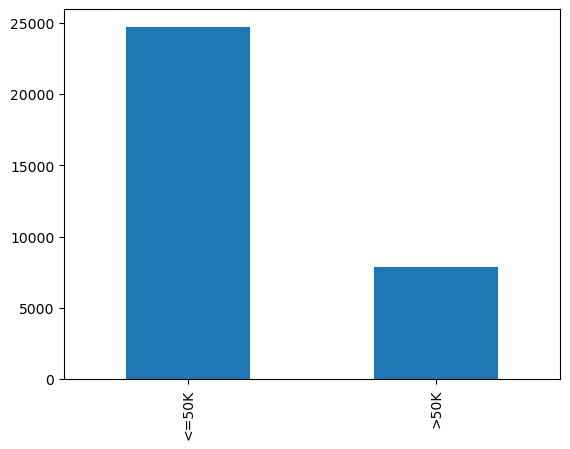

In [4]:
data["income"].value_counts().plot(kind="bar")

In [5]:
#Visualizing features
categorical_variables=[x for x in data.columns if data[x].dtype=="O"]
print(categorical_variables)
numerical_variables=[x for x in data.columns if x not in categorical_variables]
print(numerical_variables)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


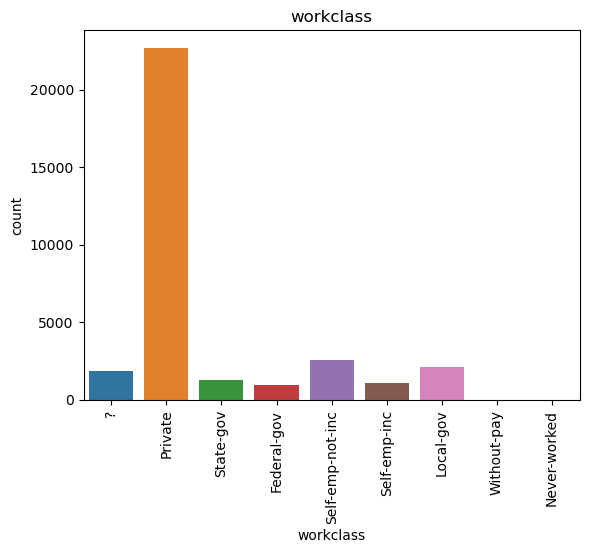

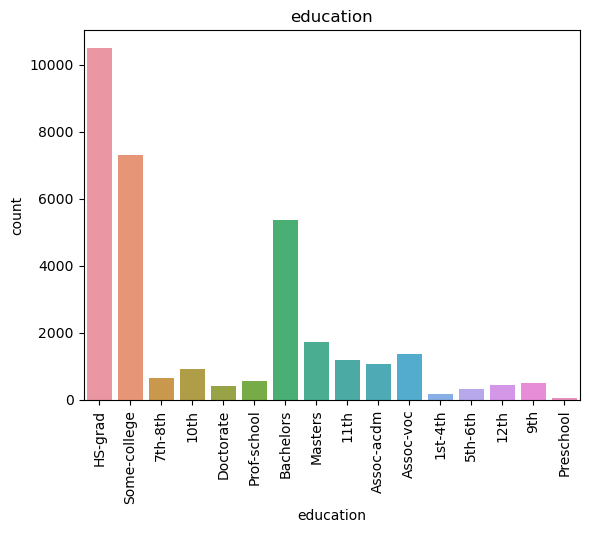

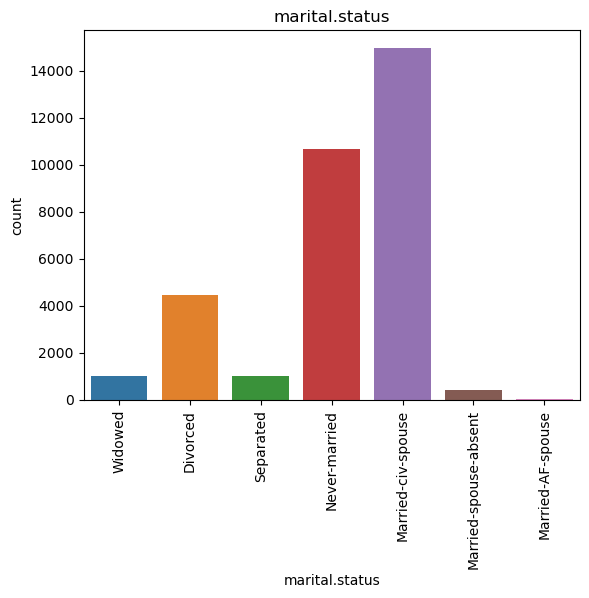

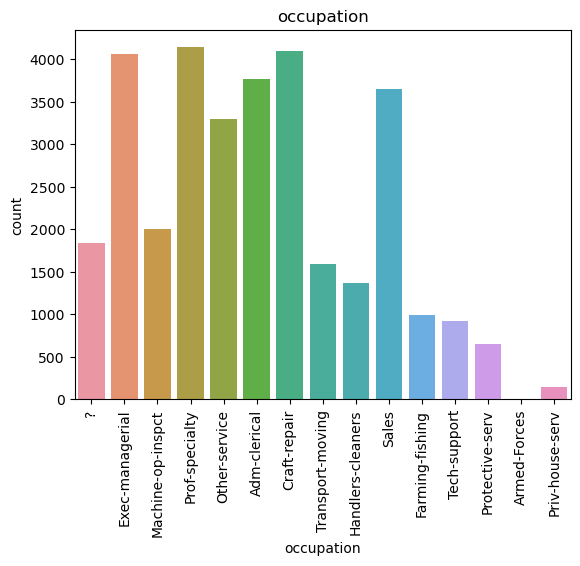

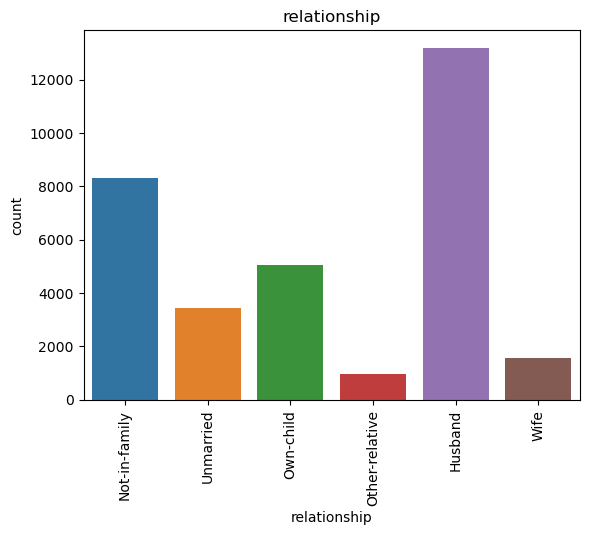

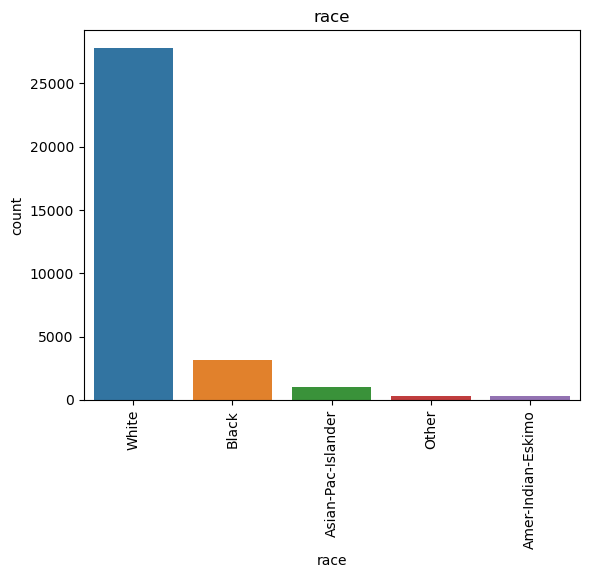

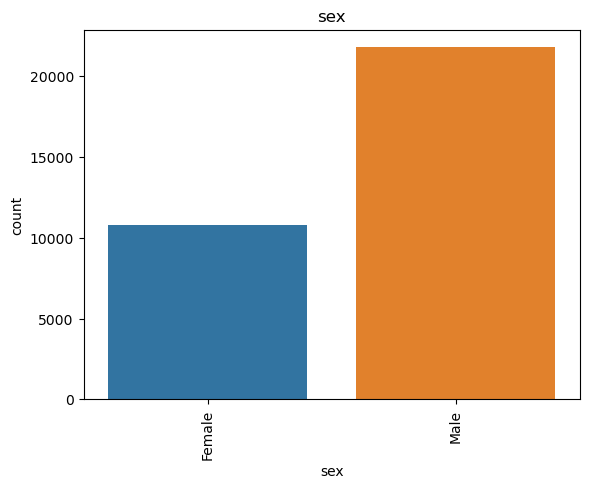

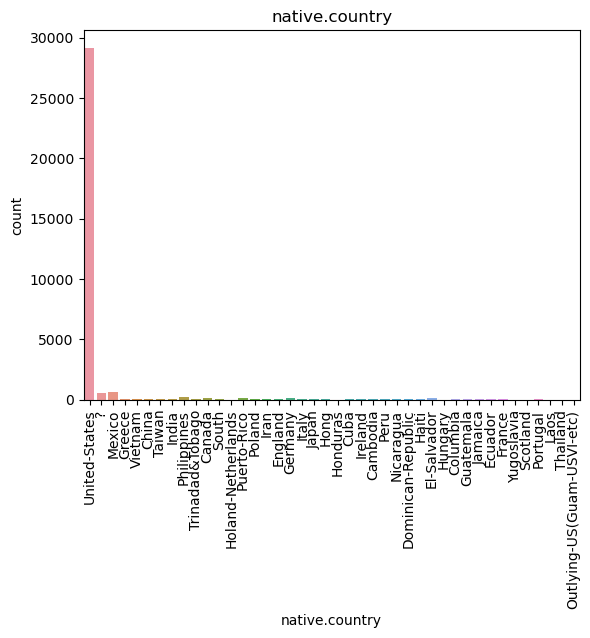

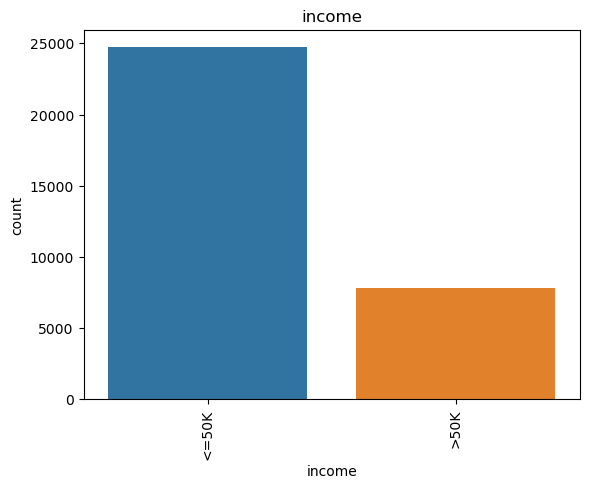

In [6]:
for i in categorical_variables:
    plt.title(i)
    sns.countplot(x=data[i])
    plt.xticks(rotation=90)
    plt.show()

# Processing the Data

In [7]:
#Deleting missing values (where there are '?')
data = data.replace({'?': np.nan}).dropna()

In [8]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
#Renaming Columns for Encoding
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [10]:
# Encode Data

#input features
data.workclass.replace(('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'),(1,2,3,4,5,6,7,8), inplace=True)
data.education.replace(('Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16), inplace=True)
data.marital_status.replace(('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'),(1,2,3,4,5,6,7), inplace=True)
data.occupation.replace(('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14), inplace=True)
data.relationship.replace(('Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'),(1,2,3,4,5,6), inplace=True)
data.race.replace(('White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'),(1,2,3,4,5), inplace=True)
data.sex.replace(('Female', 'Male'),(1,2), inplace=True)
data.native_country.replace(('United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)
#Target output
data.income.replace(('<=50K', '>50K'),(0,1), inplace=True)

In [11]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,1,132870,4,9,5,5,4,1,1,0,4356,18,1,0
3,54,1,140359,9,4,2,8,6,1,1,0,3900,40,1,0
4,41,1,264663,2,10,4,6,2,1,1,0,3900,40,1,0
5,34,1,216864,4,9,2,3,6,1,1,0,3770,45,1,0
6,38,1,150601,13,6,4,9,6,1,2,0,3770,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,1,310152,2,10,3,13,4,1,2,0,0,40,1,0
32557,27,1,257302,6,12,1,1,1,1,1,0,0,38,1,0
32558,40,1,154374,4,9,1,8,3,1,2,0,0,40,1,1
32559,58,1,151910,4,9,5,9,6,1,1,0,0,40,1,0


In [12]:
print("Shape:", data.shape)

Shape: (30162, 15)


In [13]:
#Preparing Data for Models
dataset = data.values
X = dataset[:,0:14] #Here we can select the desired features
Y = dataset[:,14] #target output: income

In [14]:
# Split Data to Train and Test
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)
print("X_Train: ", X_Train.shape)
print("X_Test: ", X_Test.shape)
print("Y_Train: ", Y_Train.shape)
print("Y_Test: ", Y_Test.shape)

X_Train:  (21113, 14)
X_Test:  (9049, 14)
Y_Train:  (21113,)
Y_Test:  (9049,)


# Classification Models

In [15]:
num_instances = len(X)

c_models = []
c_models.append(('LR', LogisticRegression()))
c_models.append(('NB', GaussianNB()))
c_models.append(('SVM', SVC()))
c_models.append(('RF', RandomForestClassifier()))
c_models.append(('KNN', KNeighborsClassifier()))
c_models.append(('ADA', AdaBoostClassifier()))
c_models.append(('SGDC', SGDClassifier()))
c_models.append(('MLP', MLPClassifier()))

# Evaluations
results = []
names = []

for name, model in c_models:
    # Fit the model
    model.fit(X_Train, Y_Train)
    
    predictions = model.predict(X_Test)
    
    # Evaluate the model
    score = accuracy_score(Y_Test, predictions)
    mse = mean_squared_error(predictions, Y_Test)
    results.append(mse)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mse)
    print(msg)

LR: 0.795558 (0.204442)
NB: 0.788816 (0.211184)


C:\Users\yasir\Anaconda3\envs\Project\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM: 0.783180 (0.216820)
RF: 0.849818 (0.150182)
KNN: 0.762736 (0.237264)
ADA: 0.857222 (0.142778)
SGDC: 0.765830 (0.234170)
MLP: 0.779202 (0.220798)


# Deep Neural Network

In [16]:
# create model
deep_model = Sequential()
deep_model.add(Dense(28, input_shape = (X_Train.shape[1], ), activation='relu', kernel_initializer="uniform"))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(20, activation='relu', kernel_initializer="uniform"))
deep_model.add(Dropout(0.2))
deep_model.add(Dense(10, activation='relu', kernel_initializer="uniform"))
deep_model.add(Dense(1, activation='sigmoid', kernel_initializer="uniform"))

# Compile model
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
deep_model.fit(X_Train, Y_Train, epochs=20, batch_size=30)

Epoch 1/20
704/704 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7689
Epoch 2/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7884
Epoch 3/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5154 - accuracy: 0.7880
Epoch 4/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5104 - accuracy: 0.7899
Epoch 5/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7889
Epoch 6/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.7926
Epoch 7/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5043 - accuracy: 0.7906
Epoch 8/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5047 - accuracy: 0.7898
Epoch 9/20
704/704 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7914
Epoch 10/20
704/704 [==============================] - 1s 2ms/step - loss: 0.4999 - accuracy: 0.7929

In [17]:
# Evaluate the model
scores = deep_model.evaluate(X_Test, Y_Test)
print("%s: %.2f%%" % (deep_model.metrics_names[1], scores[1]*100))

283/283 [==============================] - 1s 1ms/step - loss: 0.5008 - accuracy: 0.7894
accuracy: 78.94%
